<a href="https://colab.research.google.com/github/mohitt38/Pytorch/blob/main/Pytorch_with_ANN_without_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [8]:
torch.manual_seed(42)

In [9]:
df= pd.read_csv("fmnist_small.csv")

In [10]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


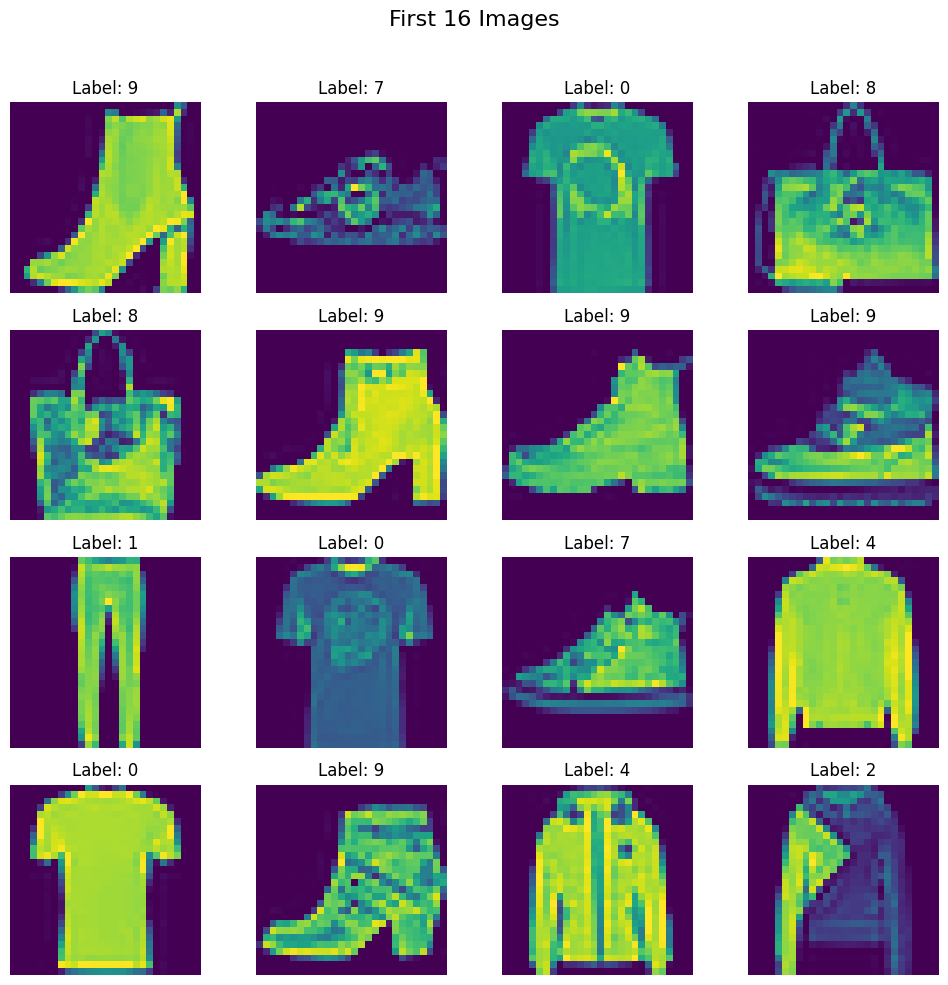

In [11]:
fig, axes = plt.subplots(4,4 , figsize=(10,10))
fig.suptitle("First 16 Images", fontsize=16)

for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"Label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [12]:
# train test split
X= df.iloc[:,1:].values
y= df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# scaling
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
X_train,X_test

(array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
         0.       ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ...

In [15]:
# create CustomData

class CustomData(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):

    return self.features[index], self.labels[index]


In [16]:
# create train_dataset object

train_dataset = CustomData(X_train, y_train)

In [17]:
len(train_dataset)

4800

In [18]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
# create test dataset
test_dataset = CustomData(X_test, y_test)

In [20]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [21]:
# defin NN class
class myNN(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

In [22]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [23]:
# initialize the model
model = myNN(X_train.shape[1])

#loss function
criteria = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [24]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criteria(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss}")



Streaming output truncated to the last 5000 lines.
Epoch: 67, Loss: 0.04617962368143102
Epoch: 67, Loss: 0.047246582685038445
Epoch: 67, Loss: 0.04749576658320924
Epoch: 67, Loss: 0.04868521074764431
Epoch: 67, Loss: 0.04887600799712042
Epoch: 67, Loss: 0.049205562798306346
Epoch: 67, Loss: 0.04945849481038749
Epoch: 67, Loss: 0.0497190867147098
Epoch: 67, Loss: 0.0499421821317325
Epoch: 67, Loss: 0.050232390044257044
Epoch: 67, Loss: 0.050526087610051035
Epoch: 67, Loss: 0.050789996612196166
Epoch: 67, Loss: 0.0513742477974544
Epoch: 67, Loss: 0.05145468871109188
Epoch: 67, Loss: 0.051662254237259425
Epoch: 67, Loss: 0.051774019316459696
Epoch: 67, Loss: 0.05217458793583016
Epoch: 67, Loss: 0.05229909673643609
Epoch: 67, Loss: 0.05235017205588519
Epoch: 67, Loss: 0.052524330830201506
Epoch: 67, Loss: 0.05301045131248732
Epoch: 67, Loss: 0.0534371666268756
Epoch: 67, Loss: 0.0535847797524184
Epoch: 67, Loss: 0.054768950892612335
Epoch: 67, Loss: 0.05496279526812335
Epoch: 67, Loss: 0.0

In [26]:
# set model to eval mode
model.eval()

myNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [27]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs.data, 1)

    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

accuracy = correct/total
print(f"Accuracy: {accuracy}")


Accuracy: 0.8325


In [28]:
len(test_loader)

38